In [254]:
# importing libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [255]:
pwd = os.getcwd()

In [256]:
df = pd.read_csv(pwd + '/Luxury watch.csv')
df.head(10)

,Brand,Model,Case Material,Strap Material,Movement Type,Water Resistance,Case Diameter (mm),Case Thickness (mm),Band Width (mm),Dial Color,Crystal Material,Complications,Power Reserve,Price (USD)
0,Rolex,Submariner,Stainless Steel,Stainless Steel,Automatic,300 meters,40.0,13.00,20.0,Black,Sapphire,Date,48 hours,"9,500"
1,Omega,Seamaster,Titanium,Rubber,Automatic,600 meters,43.5,14.47,21.0,Blue,Sapphire,Date,60 hours,"5,800"
2,Tag Heuer,Carrera,Stainless Steel,Leather,Automatic,100 meters,41.0,13.00,20.0,White,Sapphire,Chronograph,42 hours,"4,200"
3,Breitling,Navitimer,Stainless Steel,Stainless Steel,Automatic,30 meters,43.0,14.25,22.0,Black,Sapphire,Chronograph,70 hours,"7,900"
4,Cartier,Tank Solo,Stainless Steel,Leather,Quartz,30 meters,31.0,6.05,20.0,Silver,Sapphire,None,NaN,"2,800"
5,Jaeger-LeCoultre,Reverso,Stainless Steel,Leather,Manual,30 meters,42.9,9.20,20.0,Black,Sapphire,None,45 hours,"5,500"
6,Seiko,Prospex,Stainless Steel,Rubber,Automatic,200 meters,44.3,12.90,20.0,Black,Sapphire,Date,50 hours,"1,400"
7,Citizen,Promaster,Stainless Steel,Stainless Steel,Eco-Drive,200 meters,42.0,13.00,22.0,Black,Mineral,Chronograph,270 days,"1,200"
8,Tissot,Le Locle,Stainless Steel,Leather,Automatic,30 meters,39.3,9.75,19.0,White,Sapphire,Date,38 hours,650
9,Hamilton,Khaki Field,Stainless Steel,Leather,Automatic,100 meters,38.0,9.80,20.0,Black,Sapphire,None,80 hours,495


In [257]:
df.isna().sum()

Brand                   0
Model                   0
Case Material           0
Strap Material          0
Movement Type           0
Water Resistance        0
Case Diameter (mm)      0
Case Thickness (mm)     0
Band Width (mm)         0
Dial Color              0
Crystal Material        0
Complications           0
Power Reserve          14
Price (USD)             1
dtype: int64

In [258]:
df_clean = df.dropna()
df_clean.isnull().sum()

Brand                  0
Model                  0
Case Material          0
Strap Material         0
Movement Type          0
Water Resistance       0
Case Diameter (mm)     0
Case Thickness (mm)    0
Band Width (mm)        0
Dial Color             0
Crystal Material       0
Complications          0
Power Reserve          0
Price (USD)            0
dtype: int64

In [259]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 492 entries, 0 to 506
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Brand                492 non-null    object 
 1   Model                492 non-null    object 
 2   Case Material        492 non-null    object 
 3   Strap Material       492 non-null    object 
 4   Movement Type        492 non-null    object 
 5   Water Resistance     492 non-null    object 
 6   Case Diameter (mm)   492 non-null    float64
 7   Case Thickness (mm)  492 non-null    float64
 8   Band Width (mm)      492 non-null    float64
 9   Dial Color           492 non-null    object 
 10  Crystal Material     492 non-null    object 
 11  Complications        492 non-null    object 
 12  Power Reserve        492 non-null    object 
 13  Price (USD)          492 non-null    object 
dtypes: float64(3), object(11)
memory usage: 57.7+ KB


In [260]:
df_clean['Water Resistance'] = df_clean['Water Resistance'].str.replace('meters', '')

df_clean['Price (USD)'] = df_clean['Price (USD)'].str.replace(',', '')

/tmp/ipykernel_18904/1307472435.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Water Resistance'] = df_clean['Water Resistance'].str.replace('meters', '')
/tmp/ipykernel_18904/1307472435.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Price (USD)'] = df_clean['Price (USD)'].str.replace(',', '')


In [261]:
df_clean['Water Resistance'] = df_clean['Water Resistance'].astype('float64')

/tmp/ipykernel_18904/1258768328.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Water Resistance'] = df_clean['Water Resistance'].astype('float64')


In [262]:
# Create a mask for 'days' rows
mask_days = df_clean['Power Reserve'].str.strip().str.contains('days', na=False)

# Remove 'days' and 'hours' strings and convert to integer
df_clean['Power Reserve'] = df_clean['Power Reserve'].str.strip().str.replace('days', '').str.replace('hours', '').astype('int64')

# Multiply 'days' values by 24 to convert to hours
df_clean.loc[mask_days, 'Power Reserve'] *= 24

/tmp/ipykernel_18904/3086316996.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Power Reserve'] = df_clean['Power Reserve'].str.strip().str.replace('days', '').str.replace('hours', '').astype('int64')


In [263]:
df_clean['Price (USD)'] = df_clean['Price (USD)'].astype('float64')

/tmp/ipykernel_18904/4093527018.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Price (USD)'] = df_clean['Price (USD)'].astype('float64')


In [264]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 492 entries, 0 to 506
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Brand                492 non-null    object 
 1   Model                492 non-null    object 
 2   Case Material        492 non-null    object 
 3   Strap Material       492 non-null    object 
 4   Movement Type        492 non-null    object 
 5   Water Resistance     492 non-null    float64
 6   Case Diameter (mm)   492 non-null    float64
 7   Case Thickness (mm)  492 non-null    float64
 8   Band Width (mm)      492 non-null    float64
 9   Dial Color           492 non-null    object 
 10  Crystal Material     492 non-null    object 
 11  Complications        492 non-null    object 
 12  Power Reserve        492 non-null    int64  
 13  Price (USD)          492 non-null    float64
dtypes: float64(5), int64(1), object(8)
memory usage: 57.7+ KB


In [265]:
df['Power Reserve'].describe()

count          493
unique          25
top       60 hours
freq            82
Name: Power Reserve, dtype: object

In [266]:
df['Power Reserve']

0       48 hours
1       60 hours
2       42 hours
3       70 hours
4            NaN
         ...    
502     38 hours
503    120 hours
504     64 hours
505     40 hours
506     38 hours
Name: Power Reserve, Length: 507, dtype: object

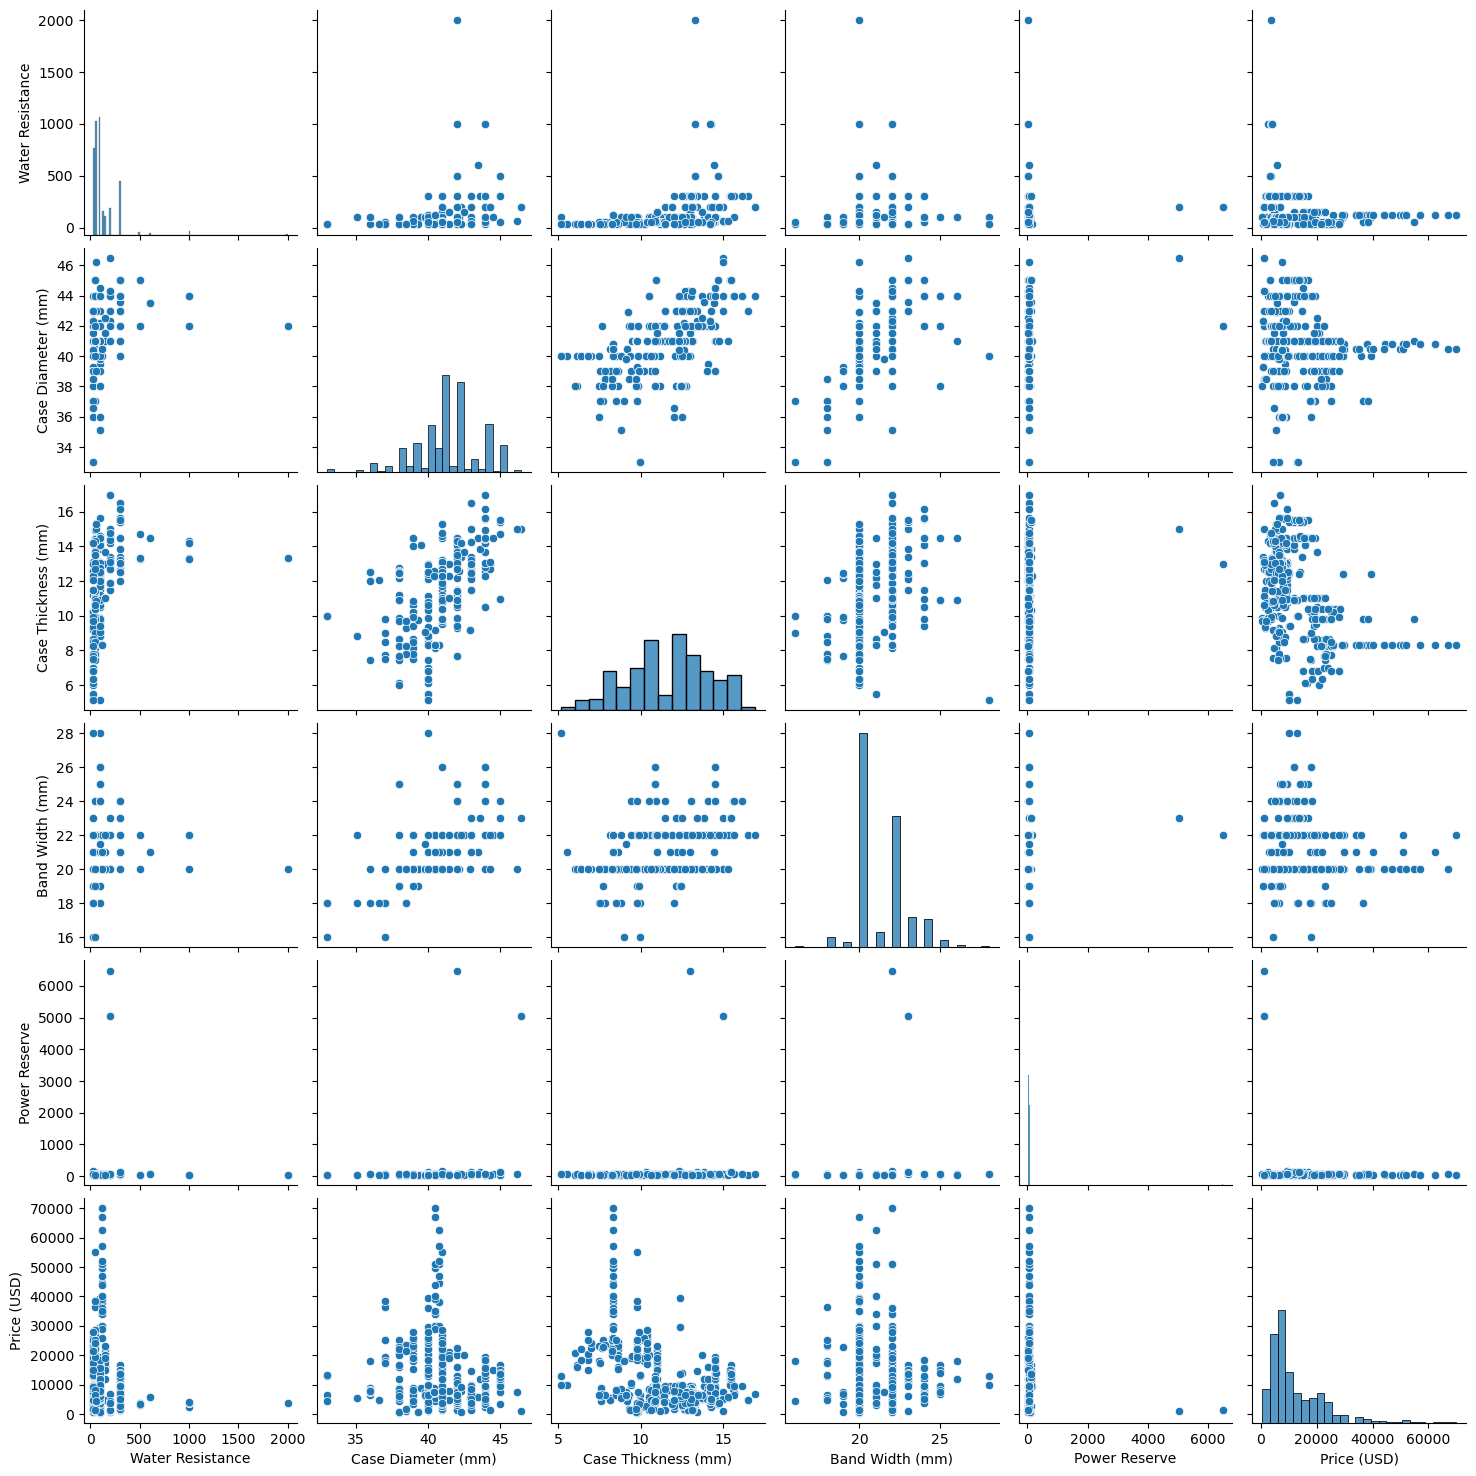

In [267]:
sns.pairplot(df_clean)

<AxesSubplot: >

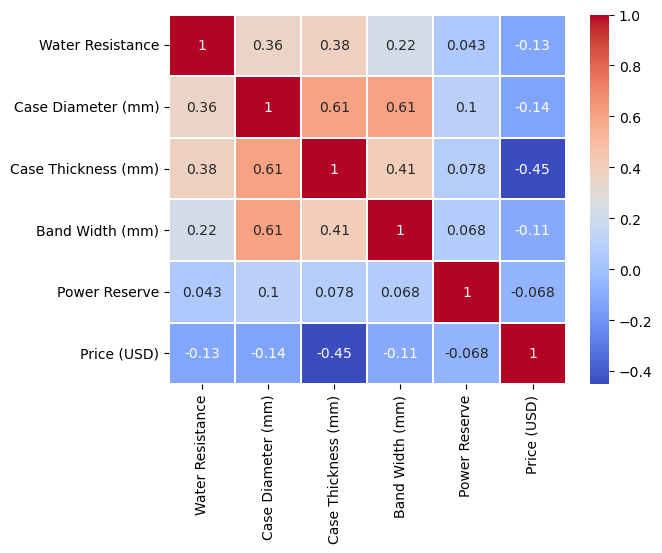

In [268]:
df_numeric = df_clean.select_dtypes(include=['float64', 'int64'])
correlation = df_numeric.corr()

sns.heatmap(correlation, cmap='coolwarm', annot=True, linewidths=0.2)

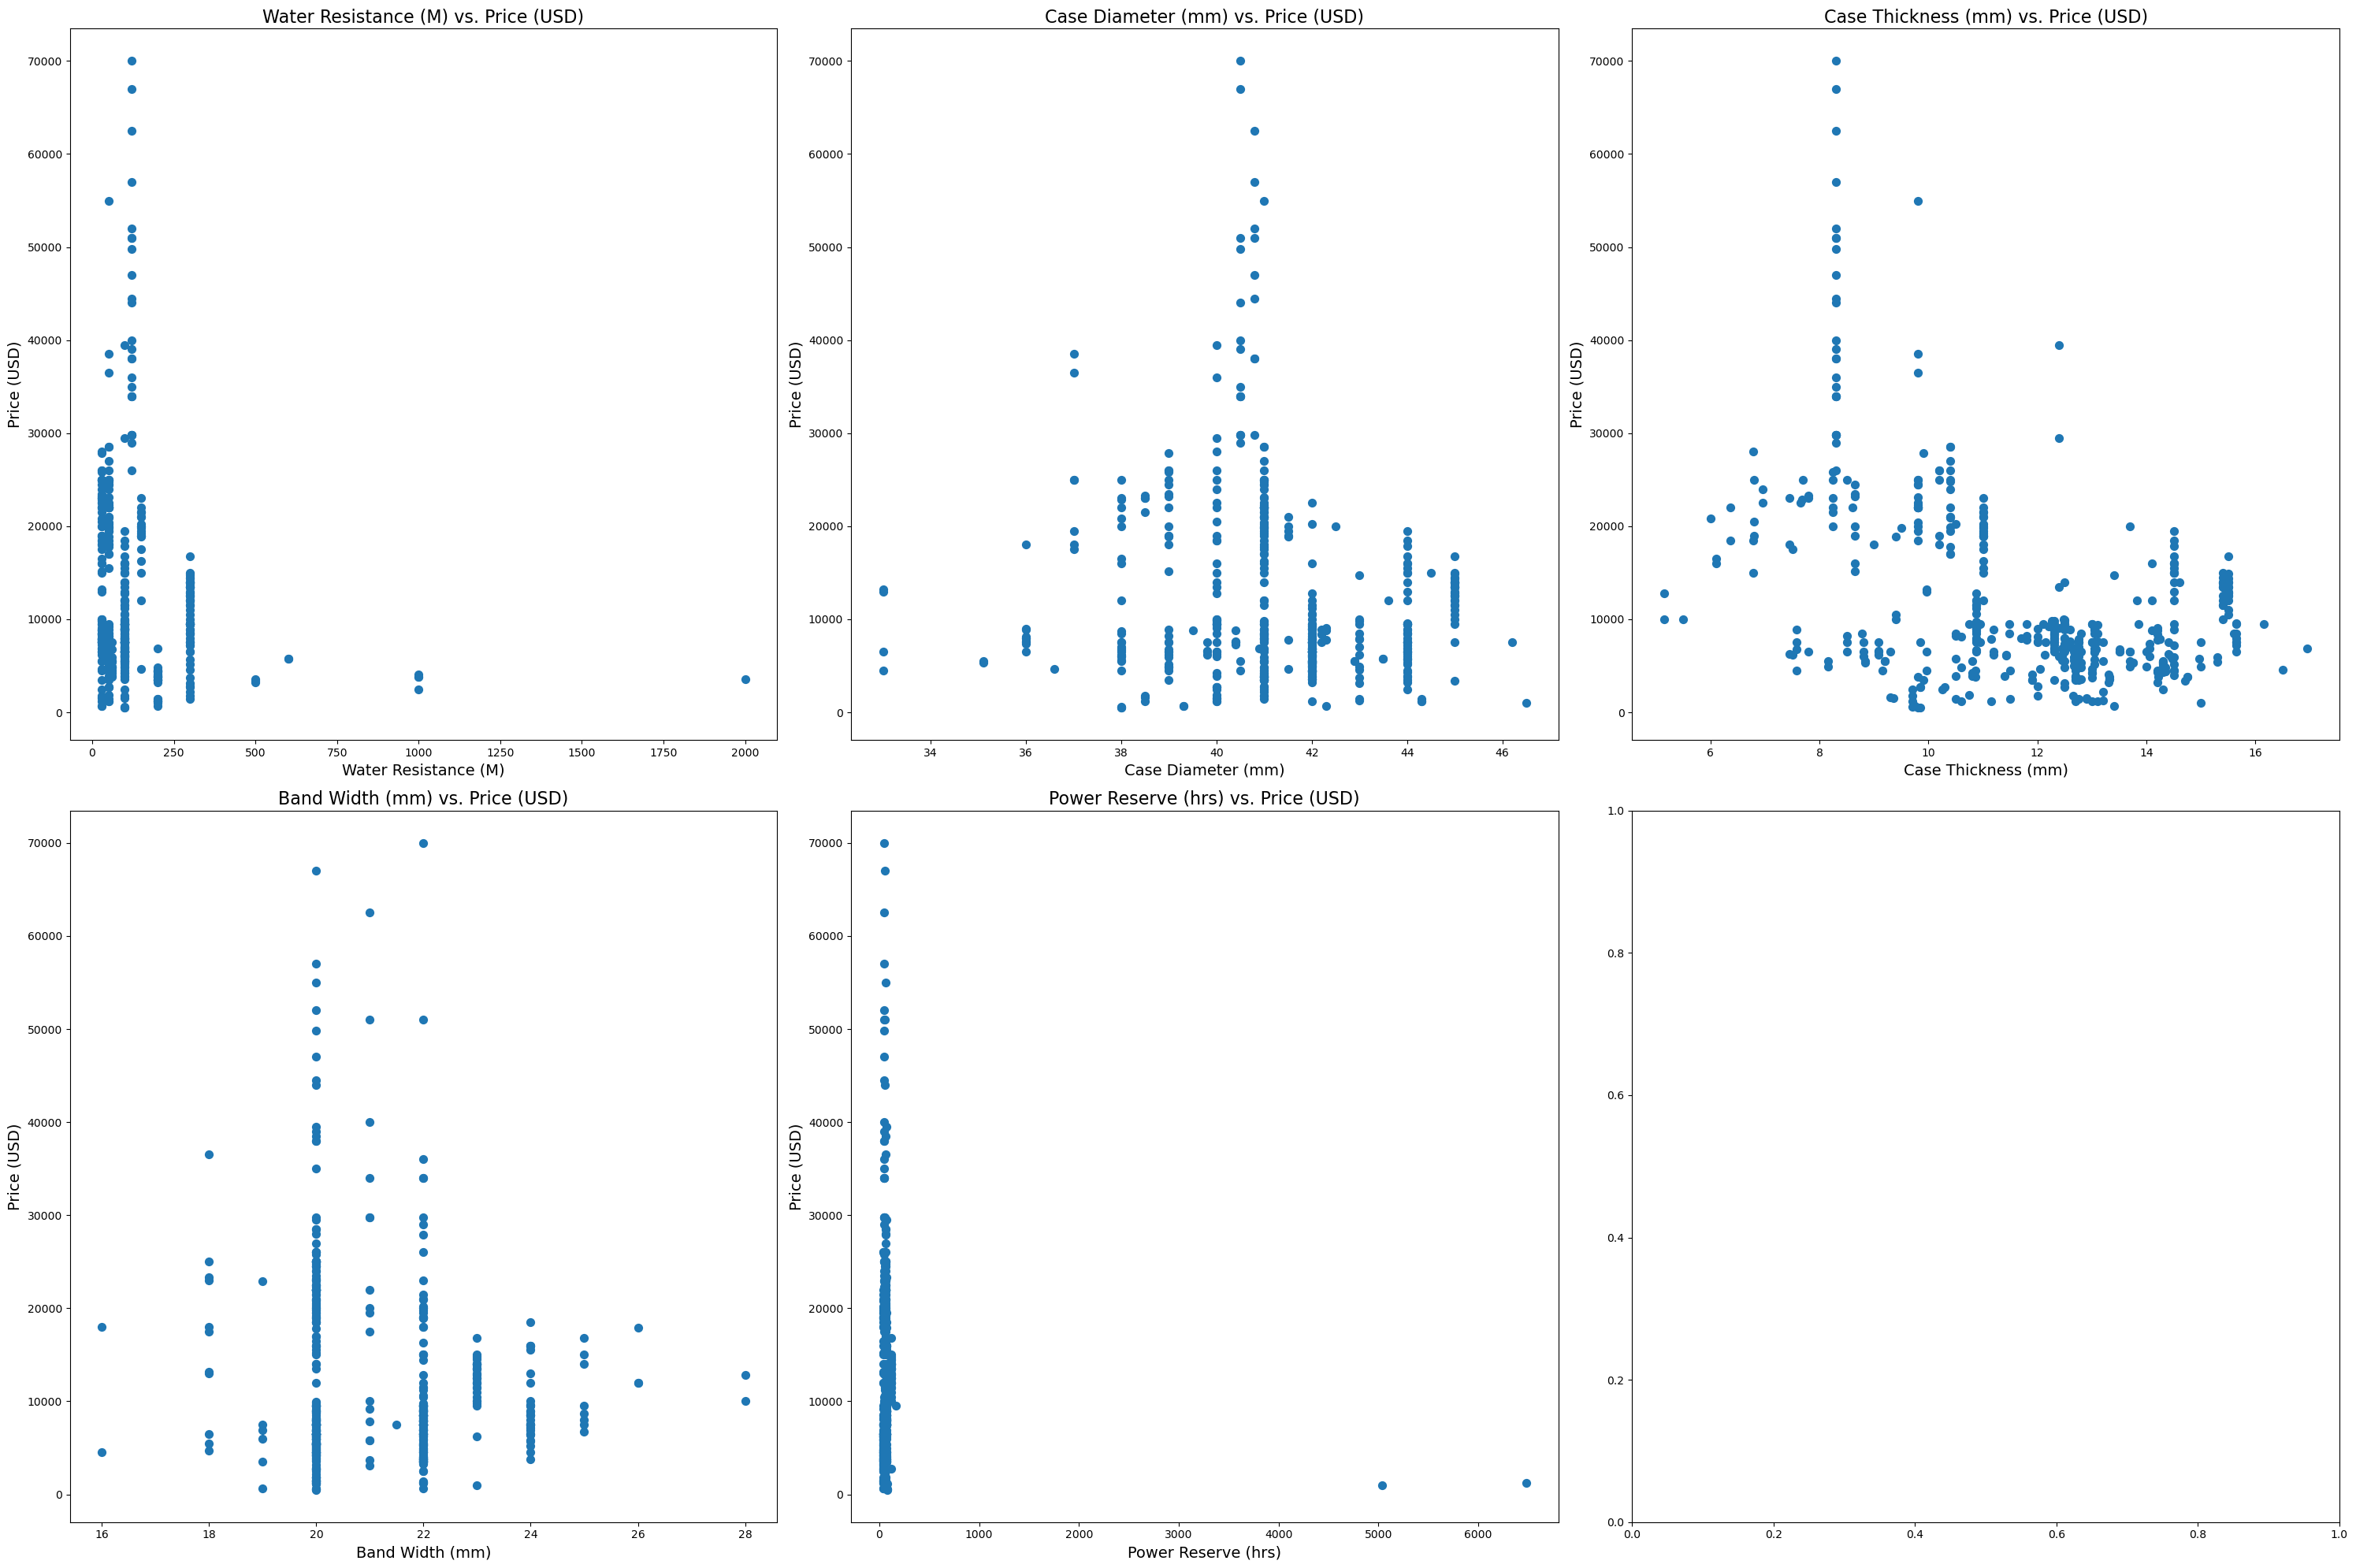

In [269]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(30, 20))

ax[0, 0].scatter(x='Water Resistance', y='Price (USD)', data=df_clean, s=50)
ax[0, 0].set_title('Water Resistance (M) vs. Price (USD)', fontsize=16)
ax[0, 0].set_xlabel('Water Resistance (M)', fontsize=14)
ax[0, 0].set_ylabel('Price (USD)', fontsize=14)

ax[0, 1].scatter(x='Case Diameter (mm)', y='Price (USD)', data=df_clean, s=50)
ax[0, 1].set_title('Case Diameter (mm) vs. Price (USD)', fontsize=16)
ax[0, 1].set_xlabel('Case Diameter (mm)', fontsize=14)
ax[0, 1].set_ylabel('Price (USD)', fontsize=14)

ax[0, 2].scatter(x='Case Thickness (mm)', y='Price (USD)', data=df_clean, s=50)
ax[0, 2].set_title('Case Thickness (mm) vs. Price (USD)', fontsize=16)
ax[0, 2].set_xlabel('Case Thickness (mm)', fontsize=14)
ax[0, 2].set_ylabel('Price (USD)', fontsize=14)

ax[1, 0].scatter(x='Band Width (mm)', y='Price (USD)', data=df_clean, s=50)
ax[1, 0].set_title('Band Width (mm) vs. Price (USD)', fontsize=16)
ax[1, 0].set_xlabel('Band Width (mm)', fontsize=14)
ax[1, 0].set_ylabel('Price (USD)', fontsize=14)

ax[1, 1].scatter(x='Power Reserve', y='Price (USD)', data=df_clean, s=50)
ax[1, 1].set_title('Power Reserve (hrs) vs. Price (USD)', fontsize=16)
ax[1, 1].set_xlabel('Power Reserve (hrs)', fontsize=14)
ax[1, 1].set_ylabel('Price (USD)', fontsize=14)

plt.tight_layout()  # Adjust the spacing between subplots
plt.show()


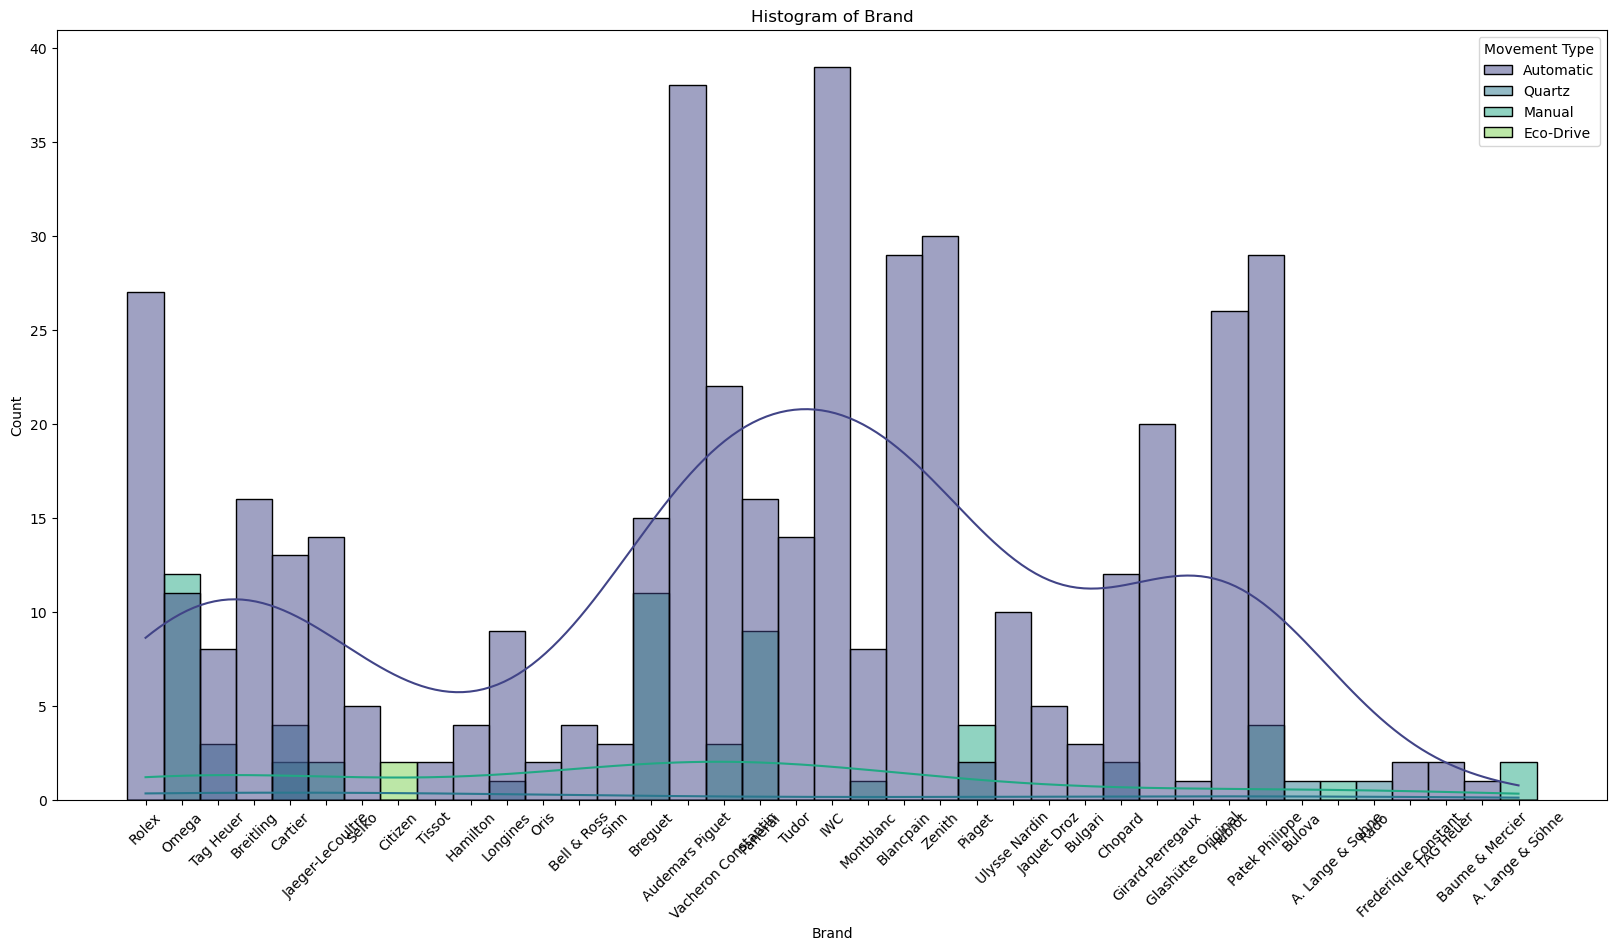

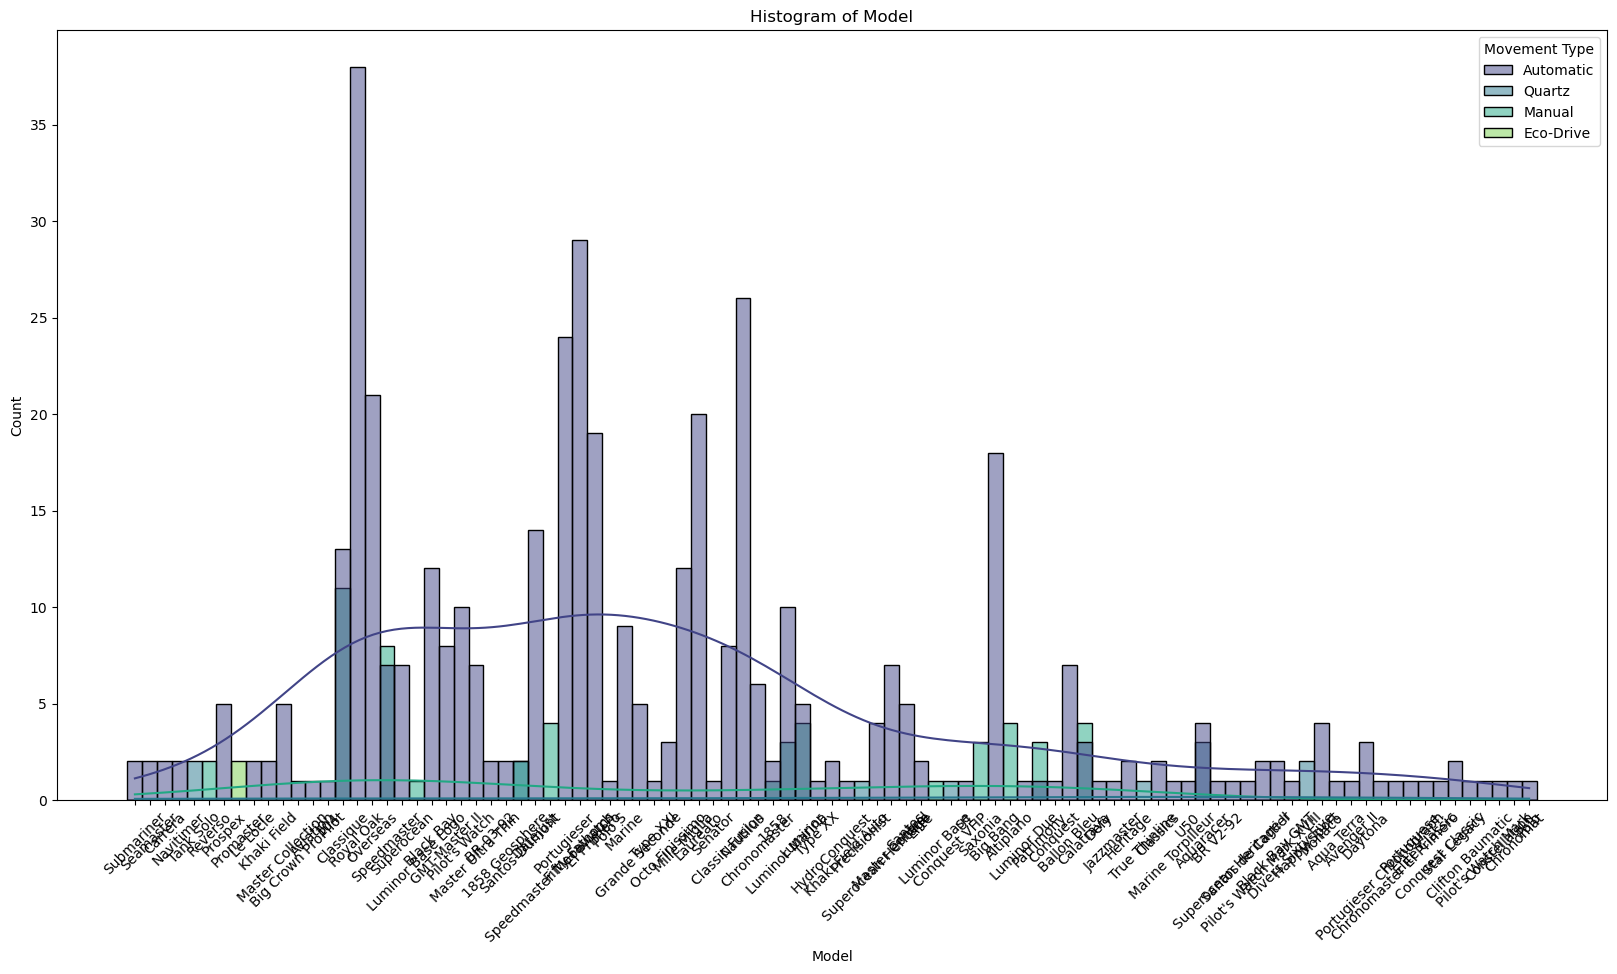

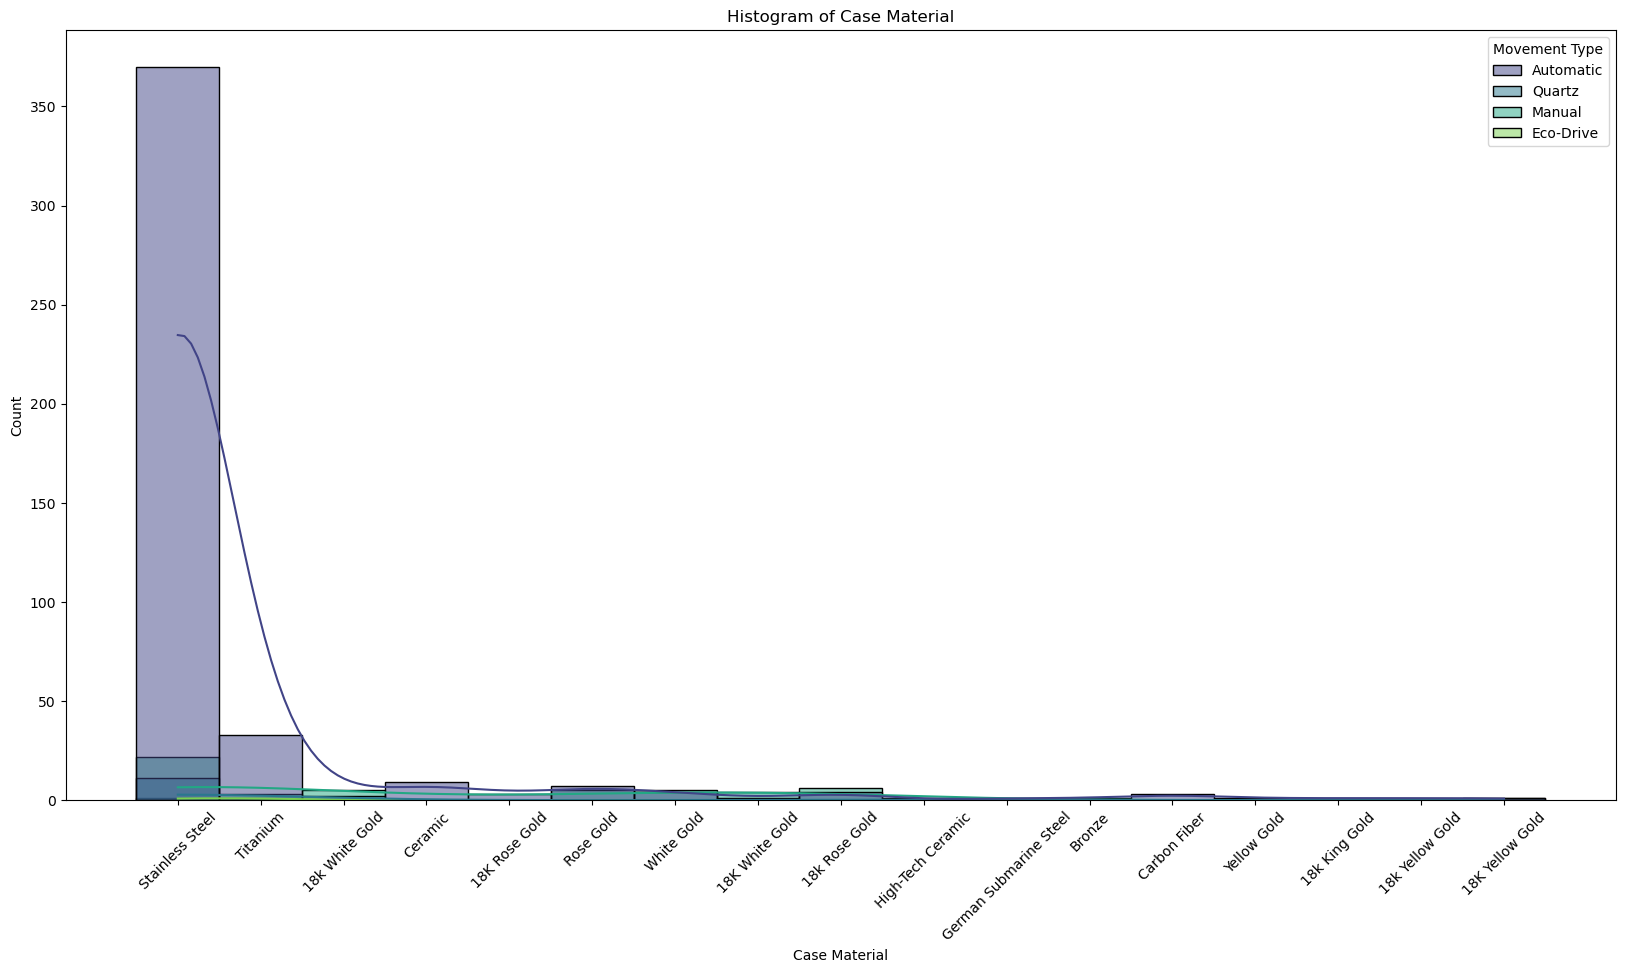

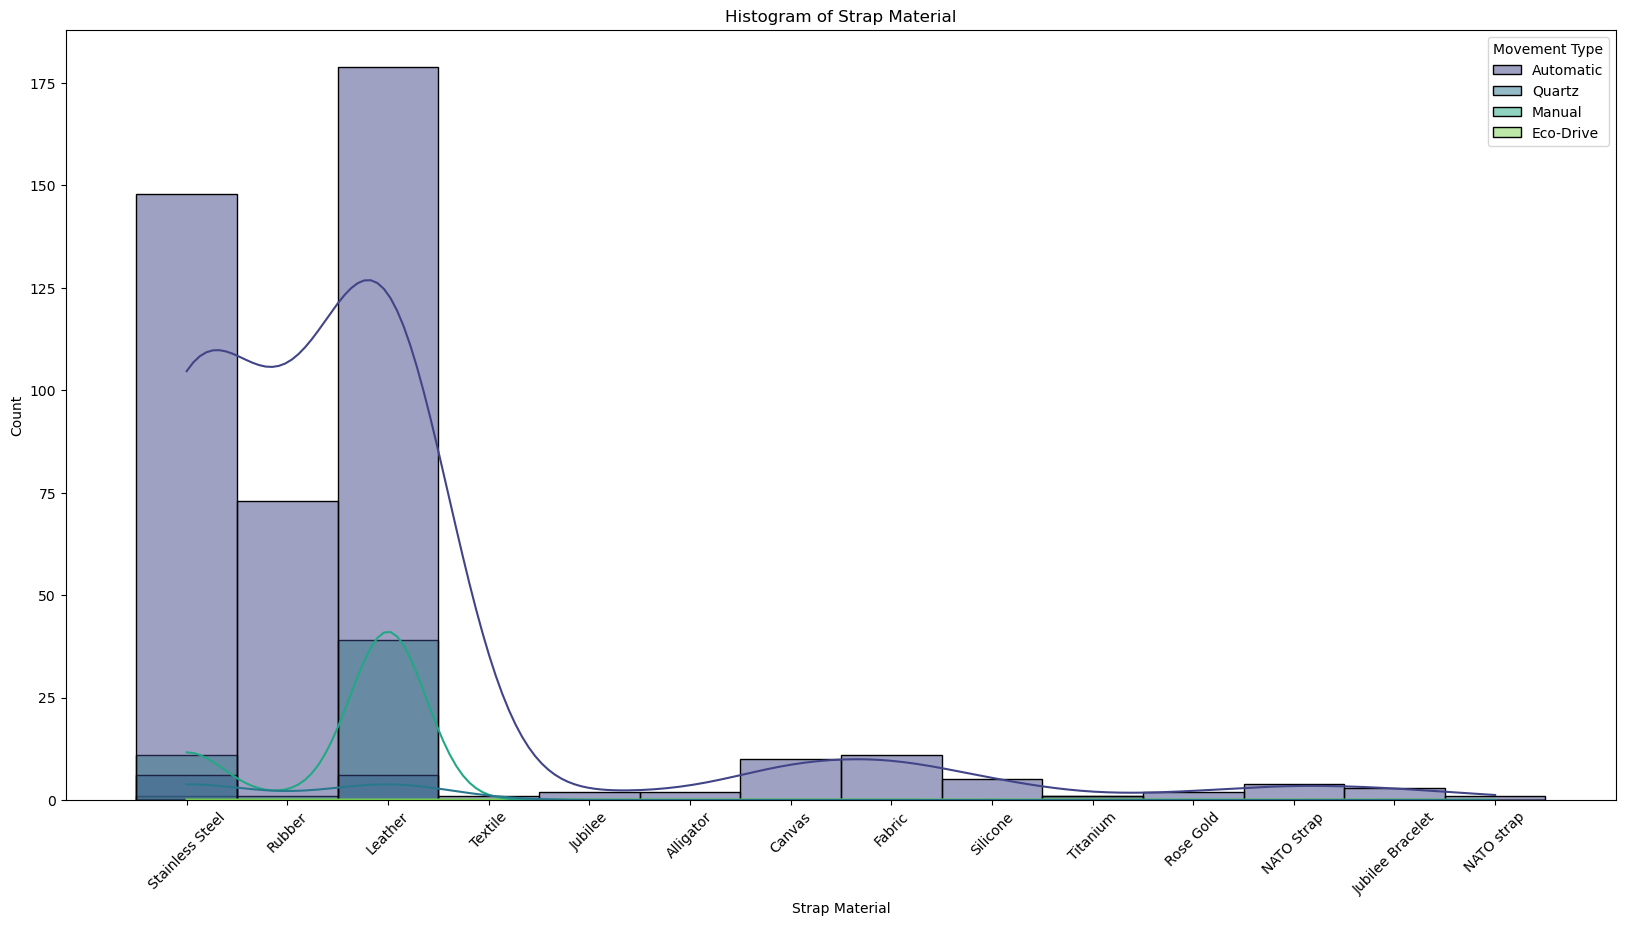

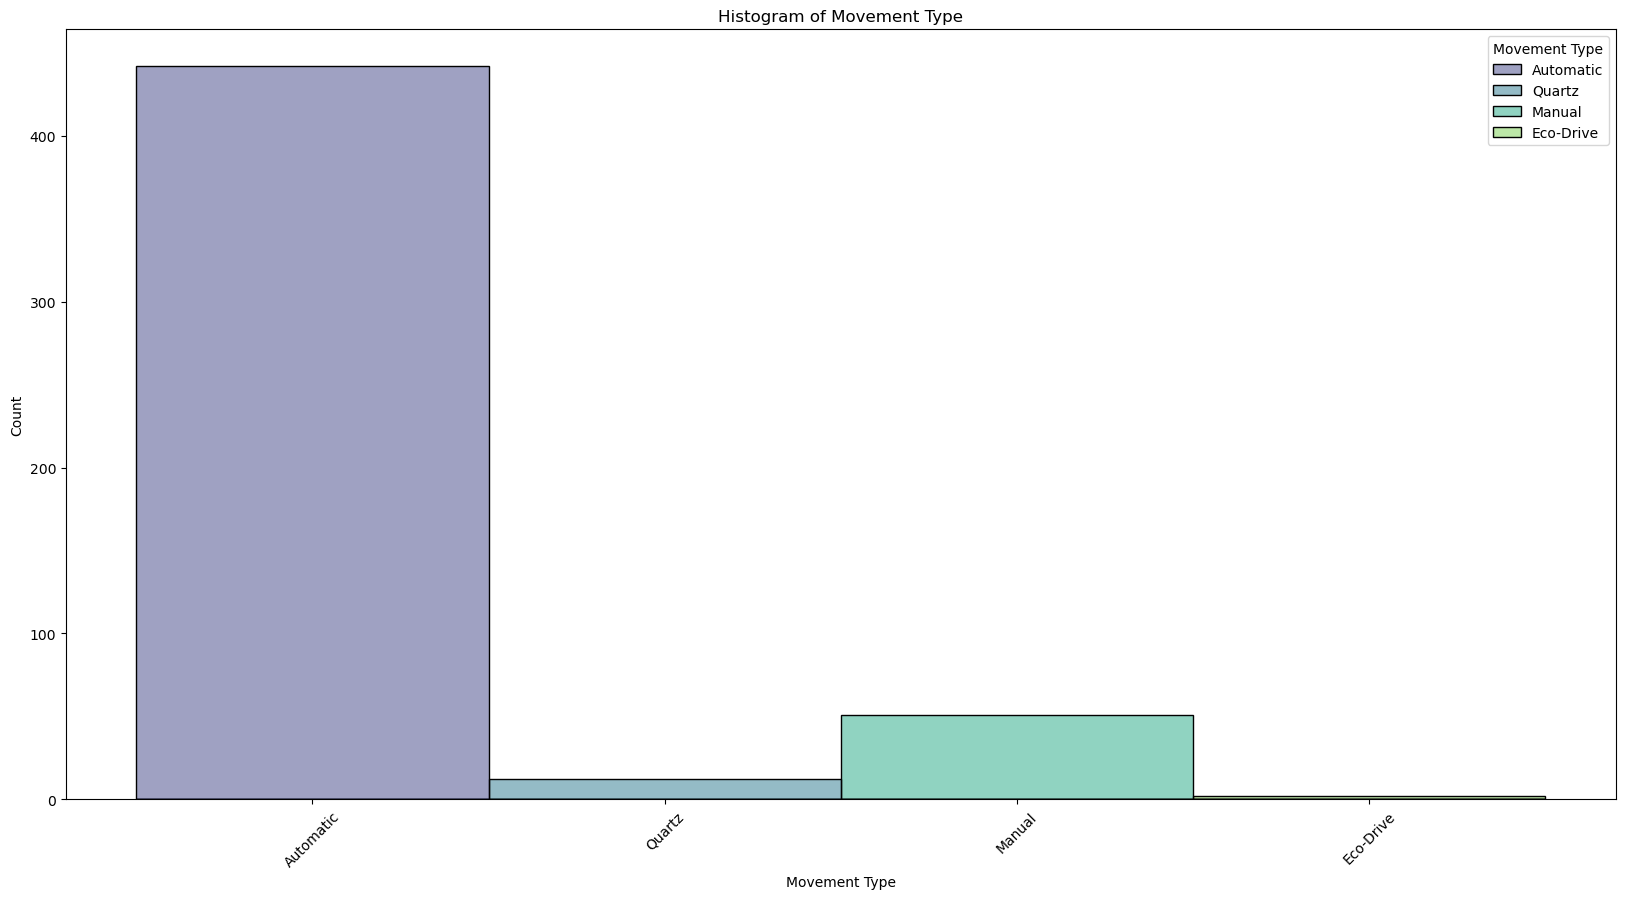

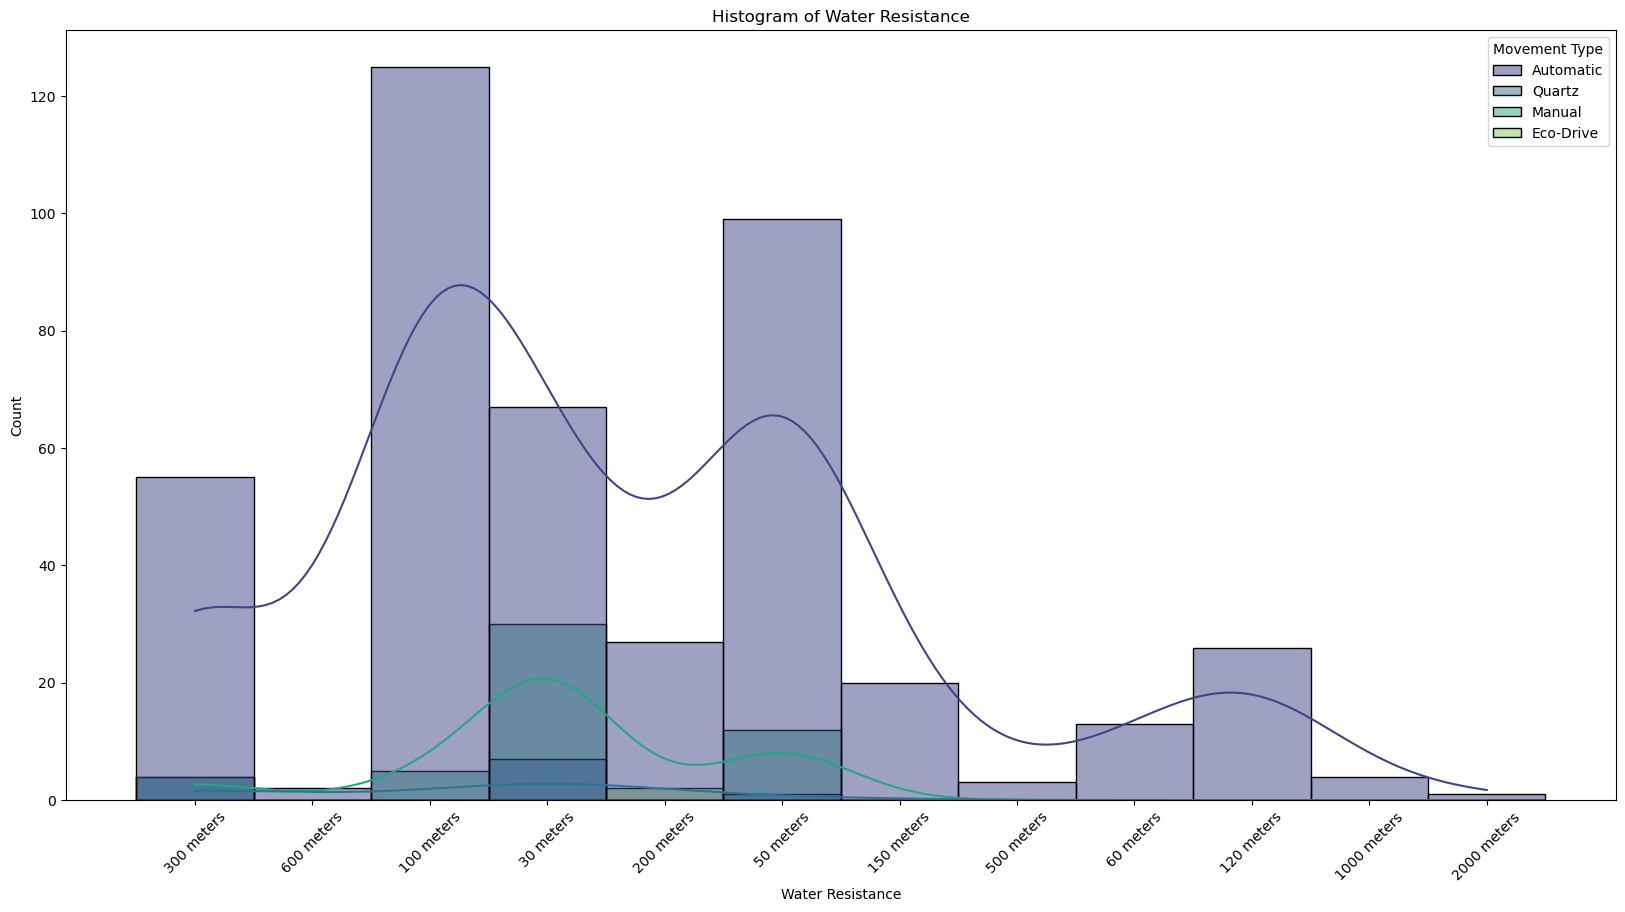

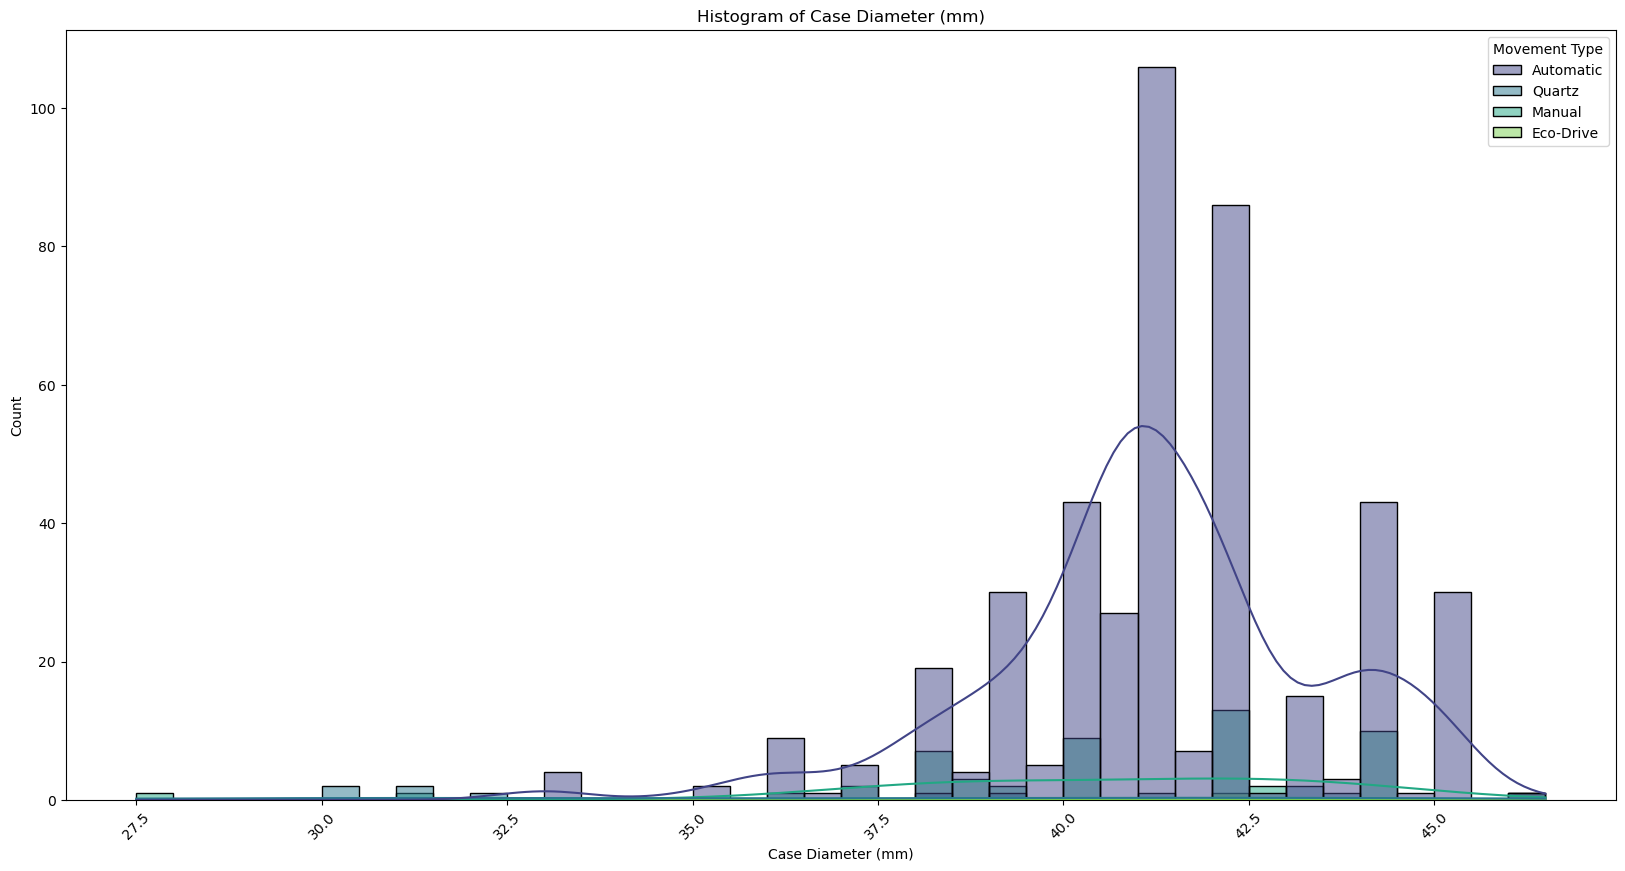

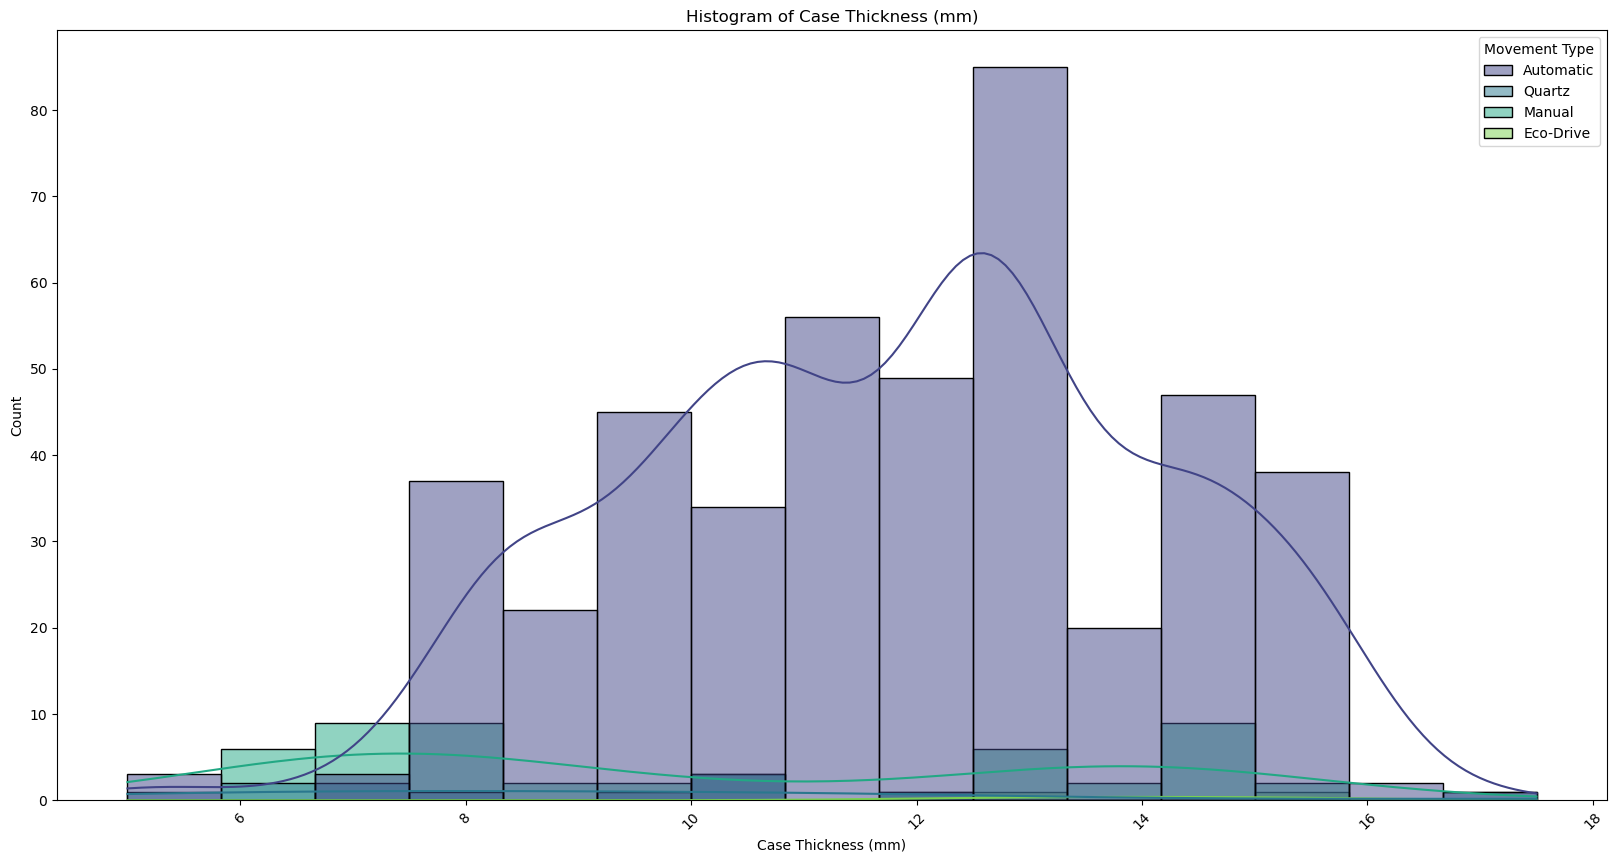

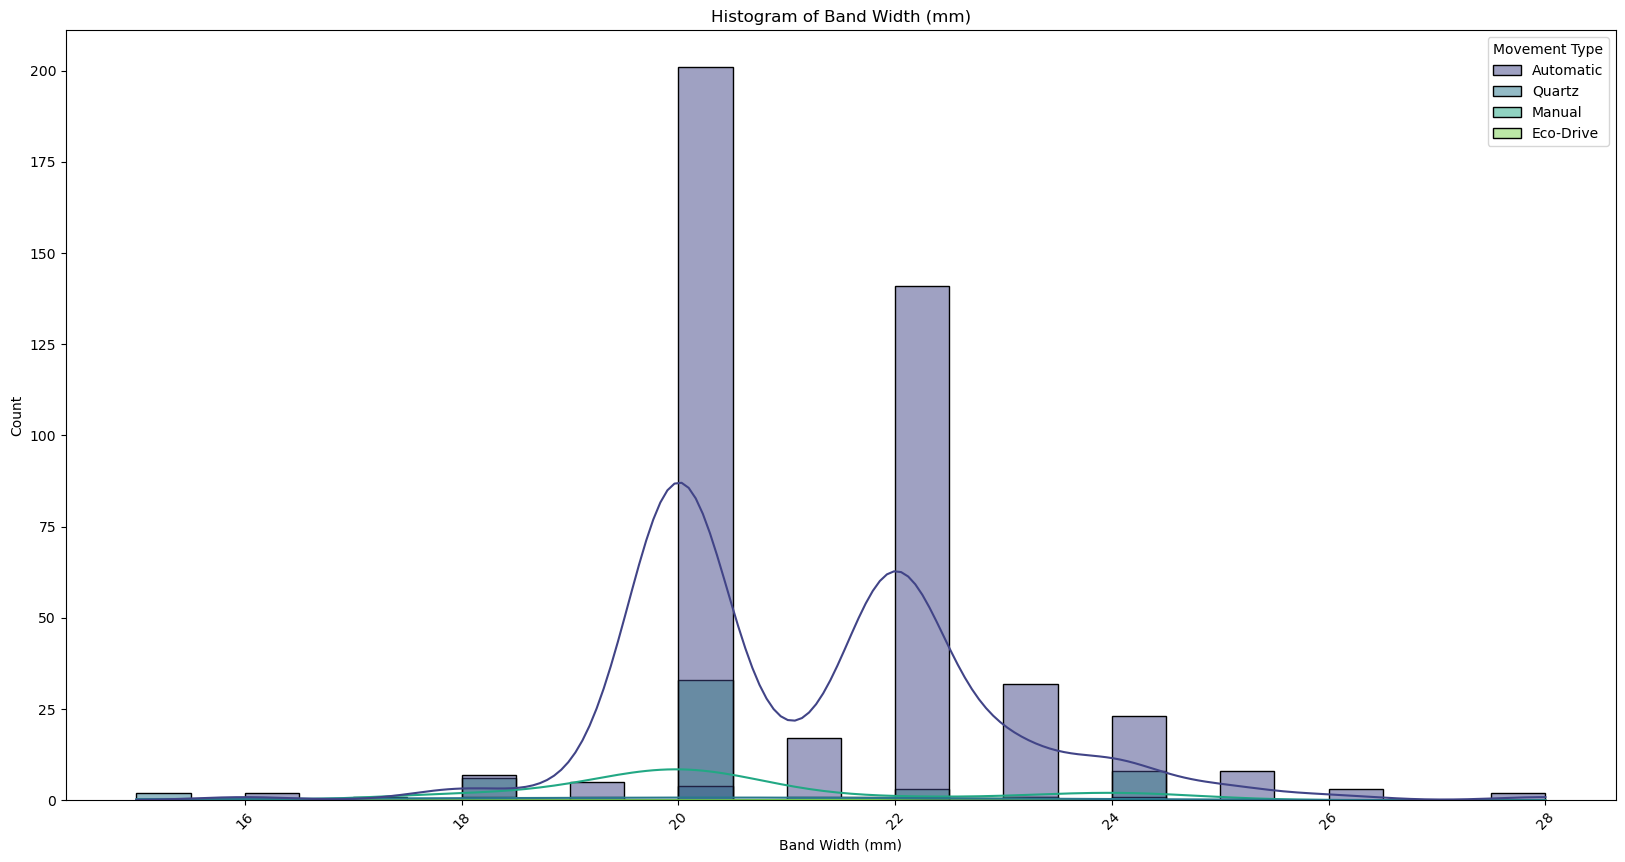

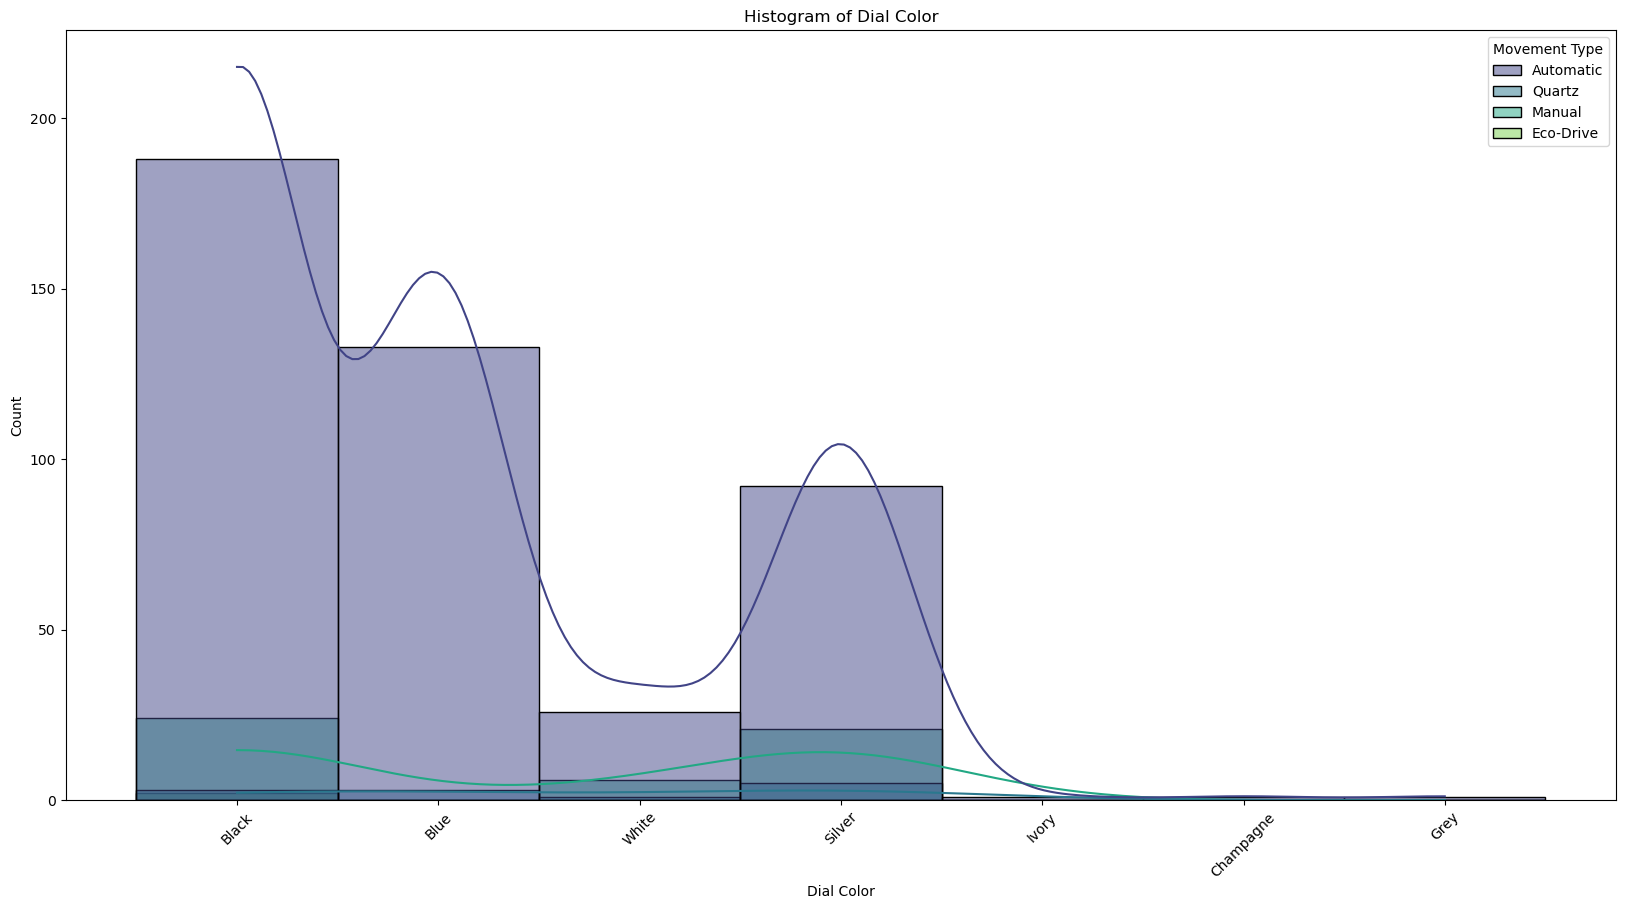

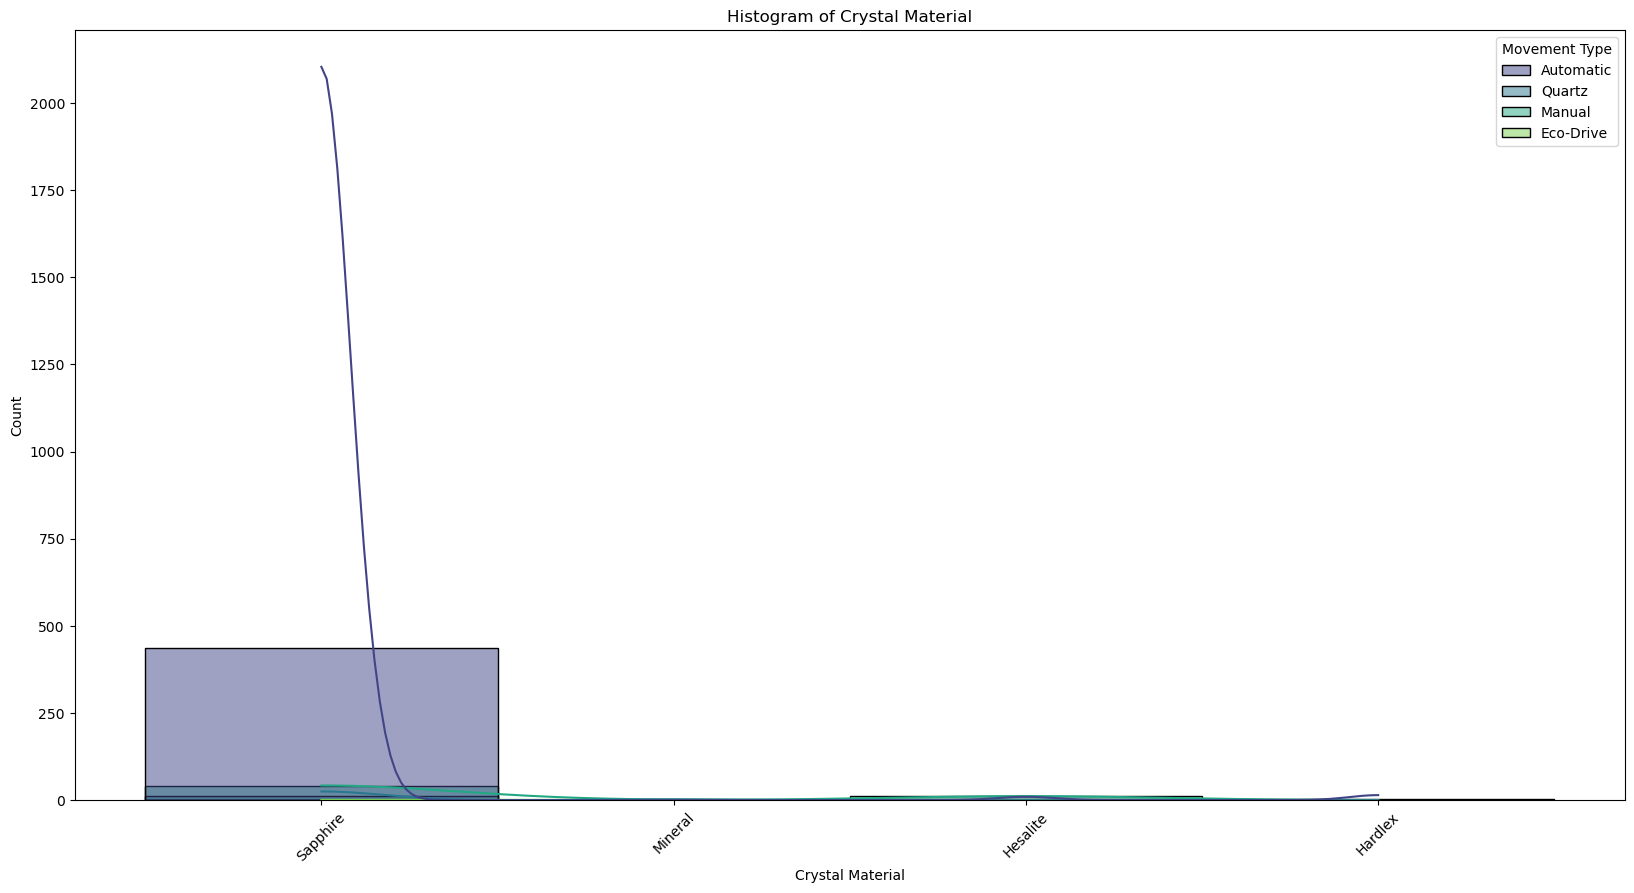

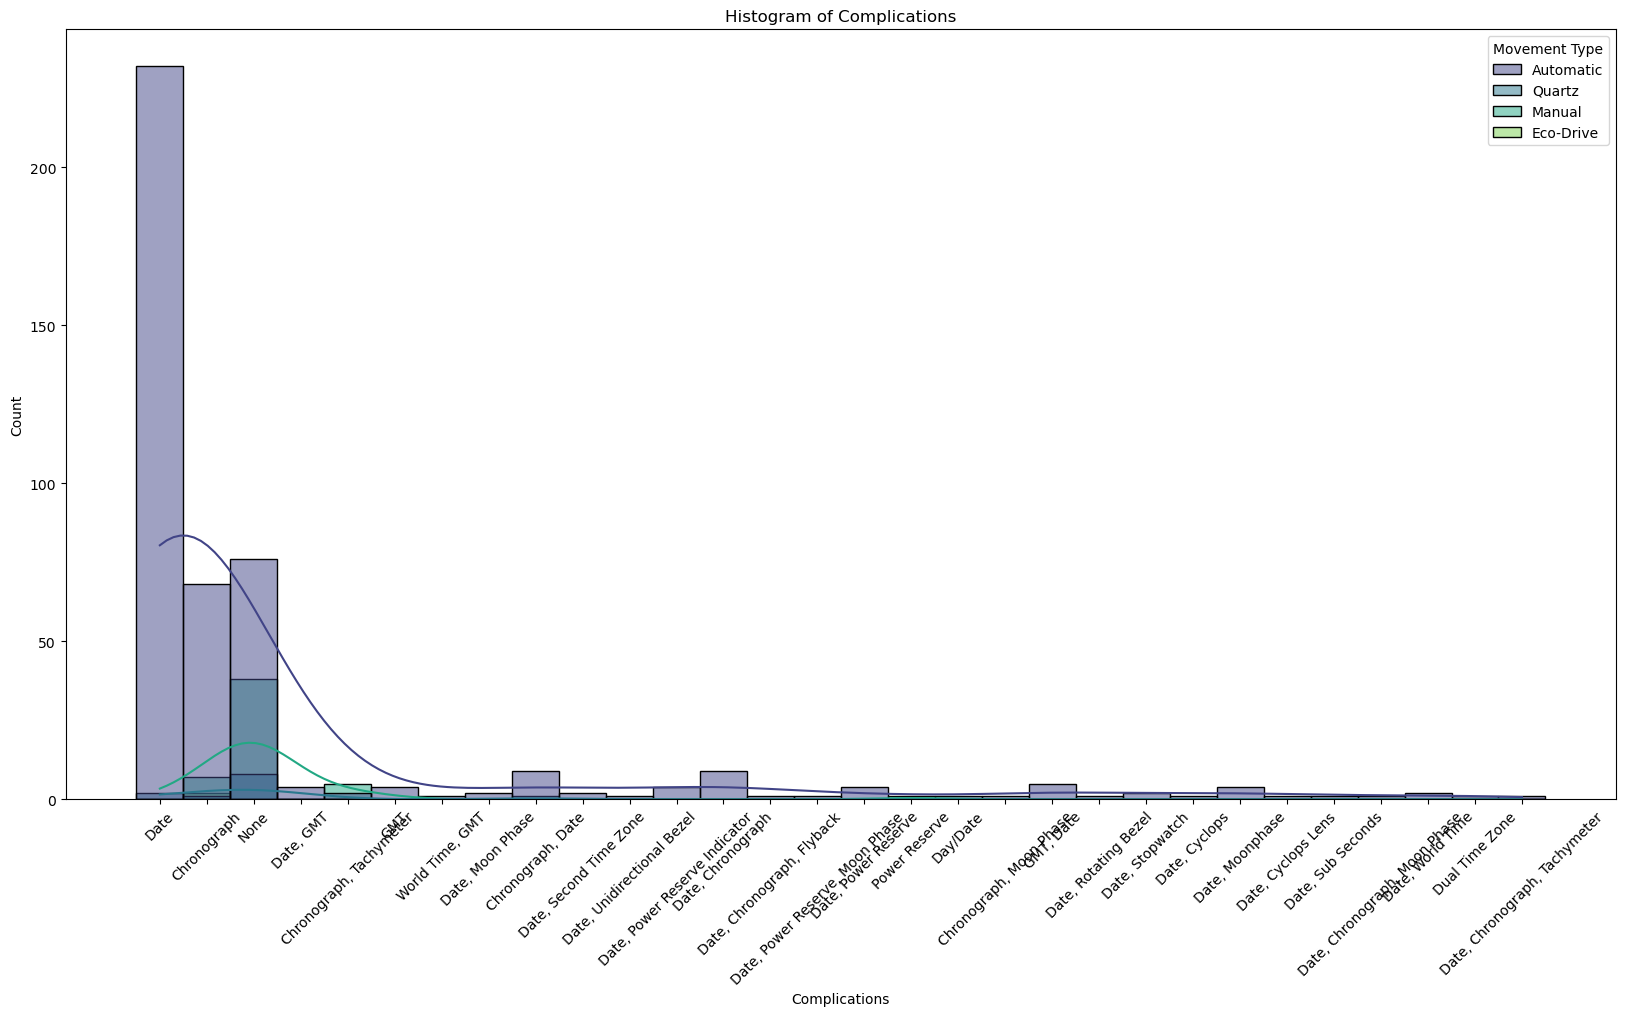

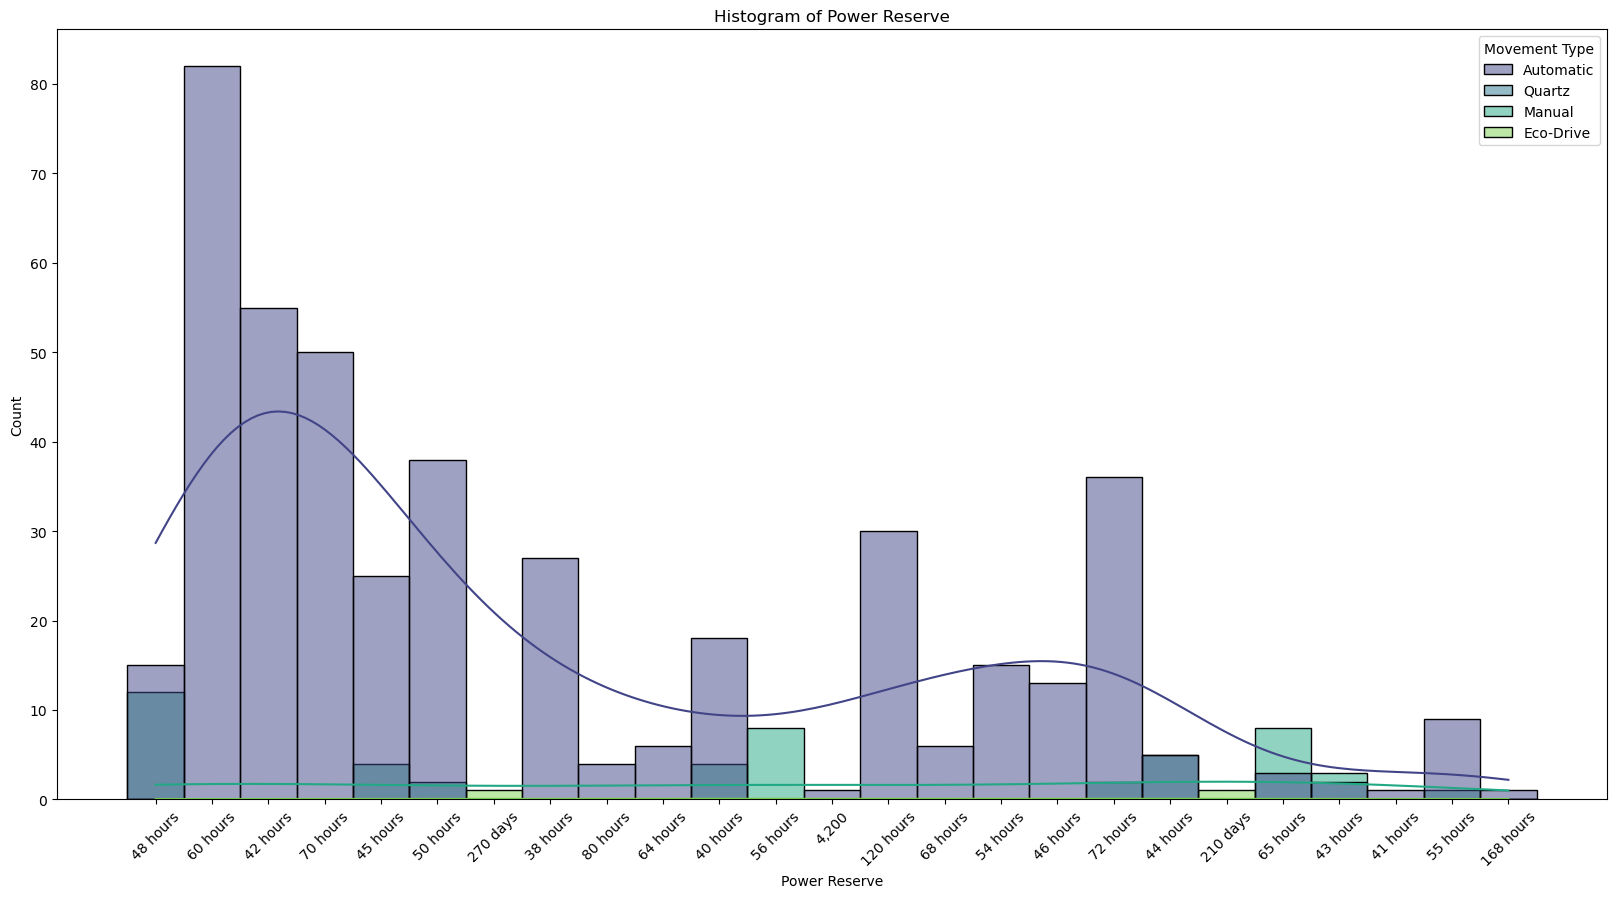

In [270]:
# Loop through all columns
for column in df_clean.columns[:13]:
        plt.figure(figsize=(20, 10))
        sns.histplot(data=df, x=column, kde=True, palette='viridis', hue='Movement Type')
        plt.tick_params(axis='x', rotation=45)
        plt.title(f'Histogram of {column}')
        plt.show()